# K Means Clustering

In [52]:
import pandas as pd
import numpy as np
import random

## Libraries to Plot the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [53]:
df = pd.read_csv('players_22.csv')
df.head()

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_50126/1327346208.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [54]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


### Seleccionando las columnas que se tomarán para agrupar a los jugadores

In [55]:
columns = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']
data = df[columns].copy()

In [56]:
data.head(10)

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
5,91,93,112000000.0,130000.0,28
6,91,95,194000000.0,230000.0,22
7,90,90,13500000.0,86000.0,35
8,90,92,99000000.0,250000.0,29
9,90,90,129500000.0,240000.0,27


In [57]:
data.shape

(19239, 5)

In [58]:
data.isnull().sum()

overall       0
potential     0
value_eur    74
wage_eur     61
age           0
dtype: int64

In [59]:
data = data.dropna()
data.shape

(19165, 5)

### Normalizando datos (1 - 10)

In [60]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [61]:
data.head(10)

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
5,9.608696,9.608696,6.195700,4.334764,5.000000
6,9.608696,10.000000,10.000000,6.909871,3.000000
7,9.413043,9.021739,1.625900,3.201717,7.333333
8,9.413043,9.413043,5.592579,7.424893,5.333333
9,9.413043,9.021739,7.007593,7.167382,4.666667


### Buscando centroides

In [62]:
def inicializar_centroides(data, k):
   
    data_shape = data.shape[1]
    data_min = data.min().min()
    data_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(data_min, data_max, data_shape)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids.transpose()

In [63]:
centroids = inicializar_centroides(data, 3)
centroids

,0,1,2
overall,5.512436,4.906542,8.103530
potential,6.121458,4.381213,1.096787
value_eur,2.623001,8.808475,9.882799
wage_eur,7.164397,1.952417,1.559130
age,2.381411,7.820017,9.719984


In [64]:
def asignando_clusters(data, centroids):
    distancias =  centroids.apply(lambda x: np.sqrt(( (data - x) ** 2).sum(axis = 1) ) )
    print(distancias)
    return distancias.idxmin(axis=1)
    

In [65]:
clusters = asignando_clusters(data, centroids)
clusters
print(centroids)

              0          1          2
0      7.865616  11.154649  13.037092
1      7.800364   9.617567  11.635575
2      7.423953  10.681960  12.622161
3      7.396024   9.532044  11.686213
4      7.926502  10.901624  12.855185
...         ...        ...        ...
19234  9.042821  10.397708  13.229166
19235  8.434638  10.628718  13.879857
19236  8.754816  10.416512  13.435452
19237  8.363190  10.604265  13.907423
19238  8.363190  10.604265  13.907423

[19165 rows x 3 columns]
                  0         1         2
overall    5.512436  4.906542  8.103530
potential  6.121458  4.381213  1.096787
value_eur  2.623001  8.808475  9.882799
wage_eur   7.164397  1.952417  1.559130
age        2.381411  7.820017  9.719984


In [66]:
clusters.value_counts()

0    18335
1      830
Name: count, dtype: int64

In [67]:
def actualizar_centroides(data, clusters):
    return data.groupby(clusters).apply(lambda x: np.exp(np.log(x).mean())).T

In [68]:
centroids = actualizar_centroides(data, clusters)
centroids

,0,1
overall,4.449311,4.551267
potential,5.232267,4.147961
value_eur,1.110119,1.015203
wage_eur,1.174811,1.061876
age,3.635055,7.391750


### Se usa una función para visualizar los cambios en los clusters

In [69]:
def plot_clusters(data, clusters, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=clusters)
    plt.scatter(x=centroids_2d[:,0], y= centroids_2d[:,1])
    plt.show()

## K-means

In [70]:
def kmeans(data, k):
    iterations = 100
    centroids = inicializar_centroides(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1

    while iteration < iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        
        clusters = asignando_clusters(data, centroids)
        centroids = actualizar_centroides(data, clusters)
        
        plot_clusters(data, clusters, centroids, iteration)
        iteration += 1
    return data

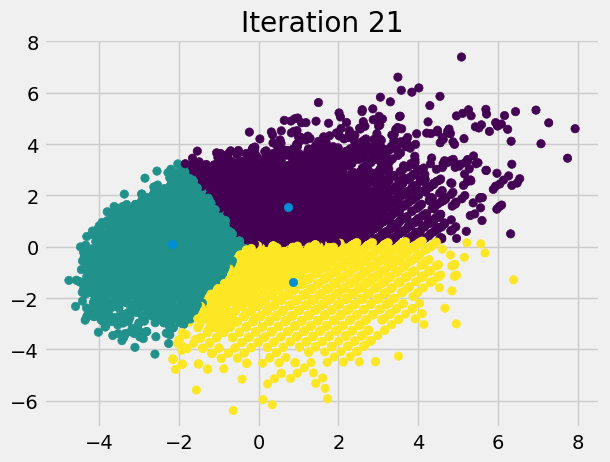

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.002830,1.012876,3.000000
19235,1.000000,2.956522,1.004686,1.000000,2.000000
19236,1.000000,2.173913,1.004222,1.000000,2.666667
19237,1.000000,3.152174,1.004686,1.000000,2.000000


In [71]:
kmeans(data, 3)

In [72]:
clusters

0        0
1        0
2        0
3        0
4        0
        ..
19234    0
19235    0
19236    0
19237    0
19238    0
Length: 19165, dtype: int64

In [73]:
clusters0 = data[clusters == 0]
clusters0

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.002830,1.012876,3.000000
19235,1.000000,2.956522,1.004686,1.000000,2.000000
19236,1.000000,2.173913,1.004222,1.000000,2.666667
19237,1.000000,3.152174,1.004686,1.000000,2.000000


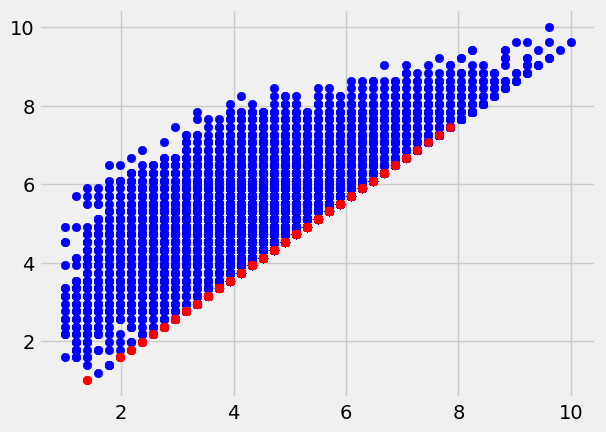

In [74]:
clusters0 = data[clusters == 0]
clusters1 = data[clusters == 1]
clusters2 = data[clusters == 2]

plt.scatter(clusters0.iloc[:,0] , clusters0.iloc[:,1], color='blue')
plt.scatter(clusters1.iloc[:,0] , clusters1.iloc[:,1], color='red')
plt.scatter(clusters2.iloc[:,0] , clusters2.iloc[:,1], color='green')
plt.show()

### Comparando con librerías

In [75]:
from sklearn.cluster import KMeans

In [76]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

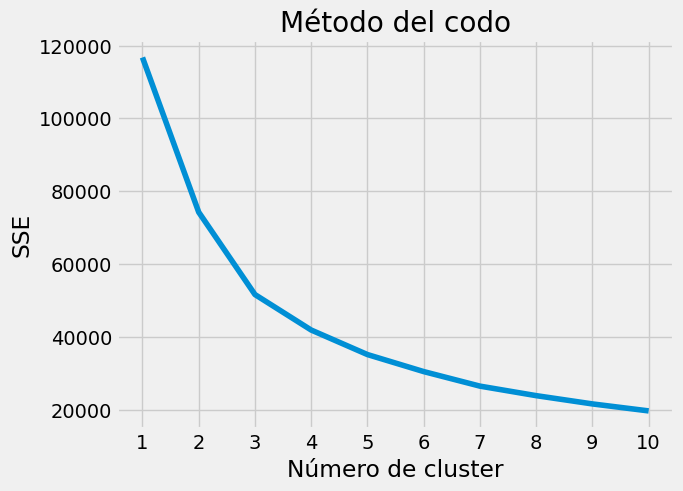

In [77]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title('Método del codo')
plt.xlabel("Número de cluster")
plt.ylabel("SSE")
plt.show()

In [78]:
cluster_model = KMeans(n_clusters=3, max_iter=300)
clusters = cluster_model.fit_predict(data)
clusters

/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

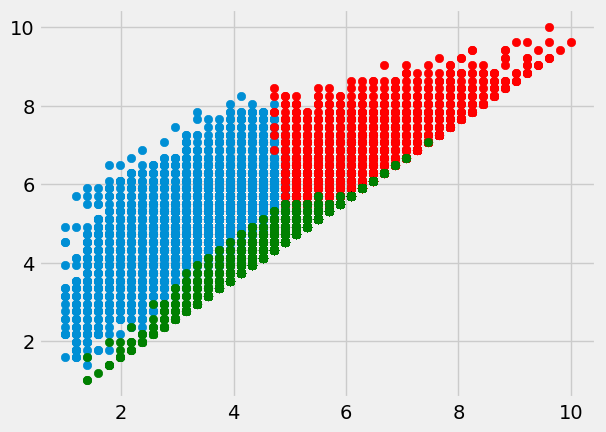

In [79]:
clusters0 = data[clusters == 0]
clusters1 = data[clusters == 1]
clusters2 = data[clusters == 2]

plt.scatter(clusters0.iloc[:,0] , clusters0.iloc[:,1])
plt.scatter(clusters1.iloc[:,0] , clusters1.iloc[:,1], color='red')
plt.scatter(clusters2.iloc[:,0] , clusters2.iloc[:,1], color='green')
plt.show()